In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.datasets import fetch_openml
housing = fetch_openml(name='house_prices',as_frame=True)
df= housing['data']
df['Selling price'] = housing['target']

In [2]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Selling price
0,1.0,60.0,RL,65.0,8450.0,Pave,None,Reg,Lvl,AllPub,...,0.0,None,None,None,0.0,2.0,2008.0,WD,Normal,208500.0
1,2.0,20.0,RL,80.0,9600.0,Pave,None,Reg,Lvl,AllPub,...,0.0,None,None,None,0.0,5.0,2007.0,WD,Normal,181500.0
2,3.0,60.0,RL,68.0,11250.0,Pave,None,IR1,Lvl,AllPub,...,0.0,None,None,None,0.0,9.0,2008.0,WD,Normal,223500.0
3,4.0,70.0,RL,60.0,9550.0,Pave,None,IR1,Lvl,AllPub,...,0.0,None,None,None,0.0,2.0,2006.0,WD,Abnorml,140000.0
4,5.0,60.0,RL,84.0,14260.0,Pave,None,IR1,Lvl,AllPub,...,0.0,None,None,None,0.0,12.0,2008.0,WD,Normal,250000.0


In [3]:
print("Total Number of Rows =",df.shape[0])
print("Total Number of Columns =",df.shape[1])

Total Number of Rows = 1460
Total Number of Columns = 81


In [4]:
# name of columns:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   MSSubClass     1460 non-null   float64
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   float64
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   float64
 18  OverallC

In [6]:
# checking null values:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
Selling price      0
Length: 81, dtype: int64

In [7]:
df.isnull().mean()*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
Selling price     0.000000
Length: 81, dtype: float64

<AxesSubplot:>

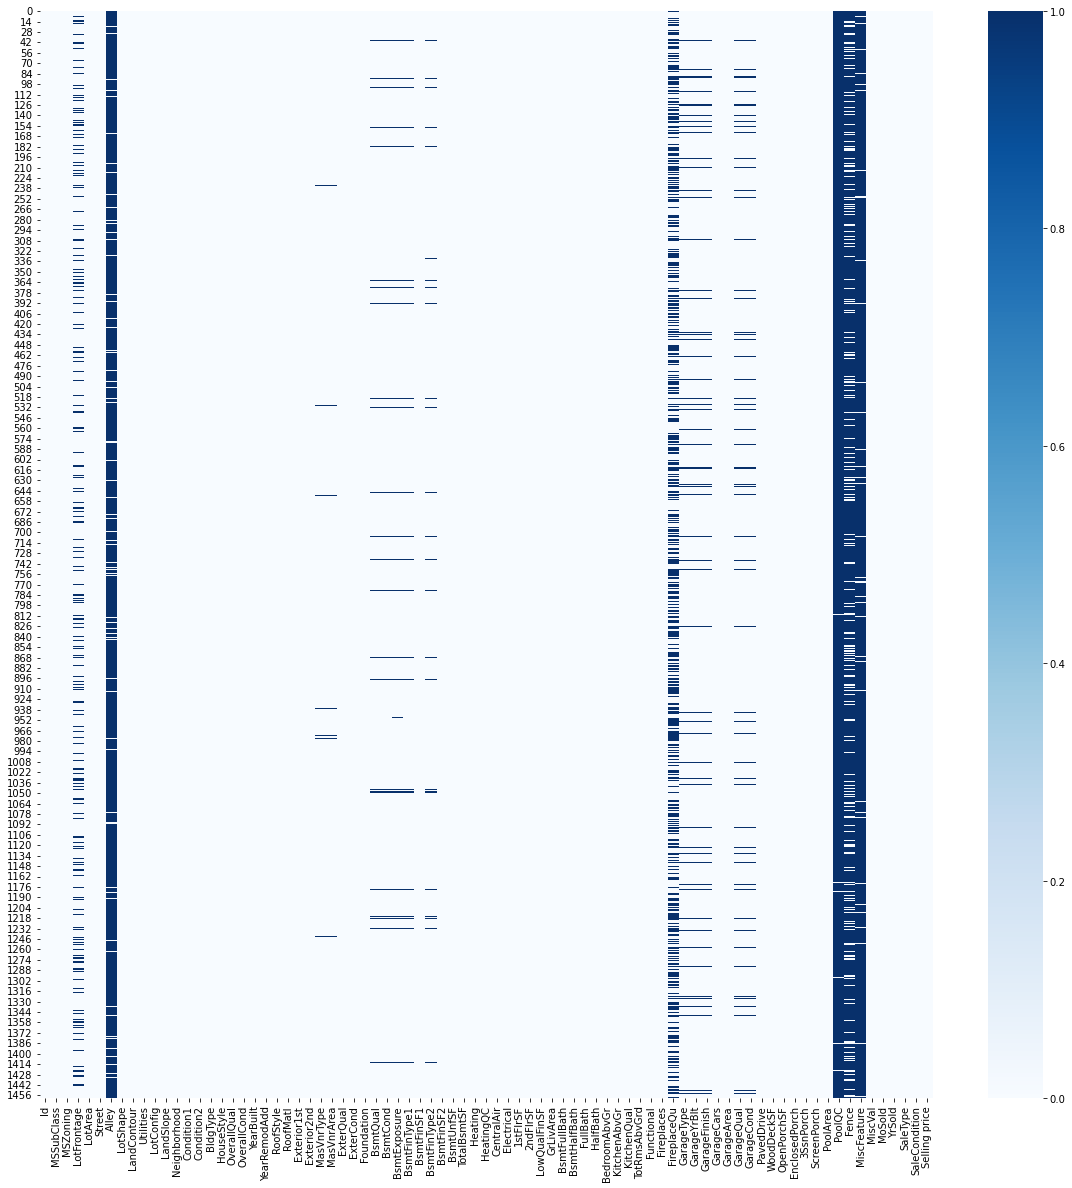

In [8]:
# heatmap for null values
plt.figure(figsize=(20,20))
sns.heatmap(df.isnull(),cmap="Blues")

In [9]:
# droping some columns 
df.drop(columns=['Id','Alley','FireplaceQu','PoolQC','Fence','MiscFeature','LotFrontage'],inplace=True)

In [10]:
df.isnull().sum().sum()

609

In [11]:
df.dropna(axis=1,inplace=True)

In [12]:
df.isnull().sum().sum()

0

In [13]:
# checking the new shape of dataset
print("Total Number of Rows =",df.shape[0])
print("Total Number of Columns =",df.shape[1])

Total Number of Rows = 1460
Total Number of Columns = 61


In [14]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'Selling price'],
      dtype='object')

In [15]:
cat_col = df.select_dtypes(include =['object']).columns
num_col =  df.select_dtypes(include =['int','float']).columns

In [16]:
# columns having categorical values
cat_col

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating',
       'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [17]:
# below columns are having numerical columns
num_col

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'Selling price'],
      dtype='object')

In [19]:
# duplicated rows
df.duplicated().sum()

0

In [18]:
# no of unique values having each columns:
df.nunique()

MSSubClass         15
MSZoning            5
LotArea          1073
Street              2
LotShape            4
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
Selling price     663
Length: 61, dtype: int64

In [22]:
# no of unique values of each columns
for i in df.columns:
    print("Columns name =",i)
    print(df[i].value_counts())
    print('-'*40)

Columns name = MSSubClass
20.0     536
60.0     299
50.0     144
120.0     87
30.0      69
160.0     63
70.0      60
80.0      58
90.0      52
190.0     30
85.0      20
75.0      16
45.0      12
180.0     10
40.0       4
Name: MSSubClass, dtype: int64
----------------------------------------
Columns name = MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
----------------------------------------
Columns name = LotArea
7200.0     25
9600.0     24
6000.0     17
9000.0     14
8400.0     14
           ..
14601.0     1
13682.0     1
4058.0      1
17104.0     1
9717.0      1
Name: LotArea, Length: 1073, dtype: int64
----------------------------------------
Columns name = Street
Pave    1454
Grvl       6
Name: Street, dtype: int64
----------------------------------------
Columns name = LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
----------------------------------------
Columns name = Land

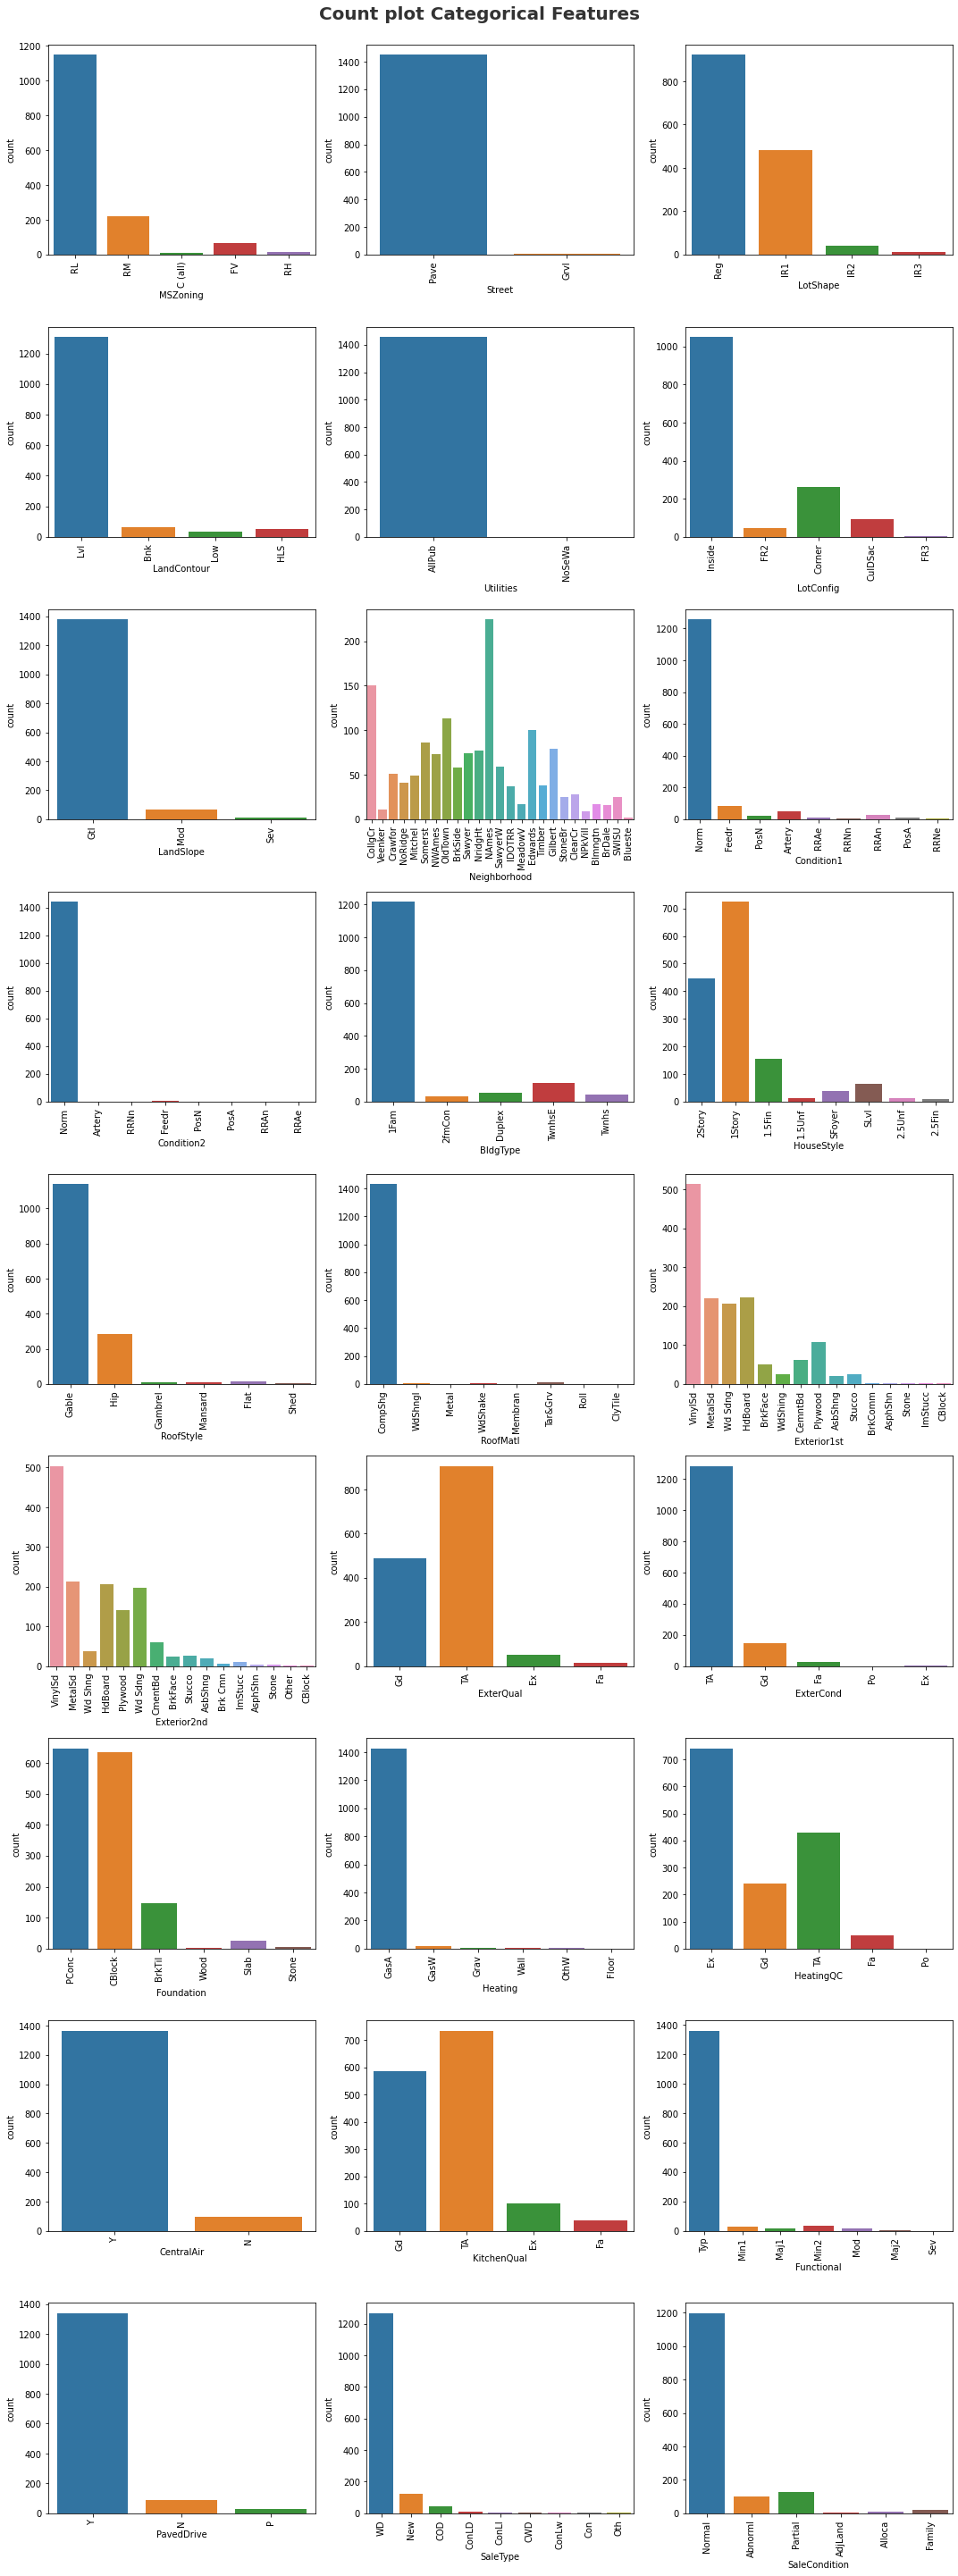

In [56]:
plt.figure(figsize=(15, 40))
plt.suptitle('Count plot Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(cat_col)):
    plt.subplot(9, 3, i+1)
    sns.countplot(x=df[cat_col[i]])
    plt.xlabel(cat_col[i])
    plt.xticks(rotation = 90)
    plt.tight_layout()

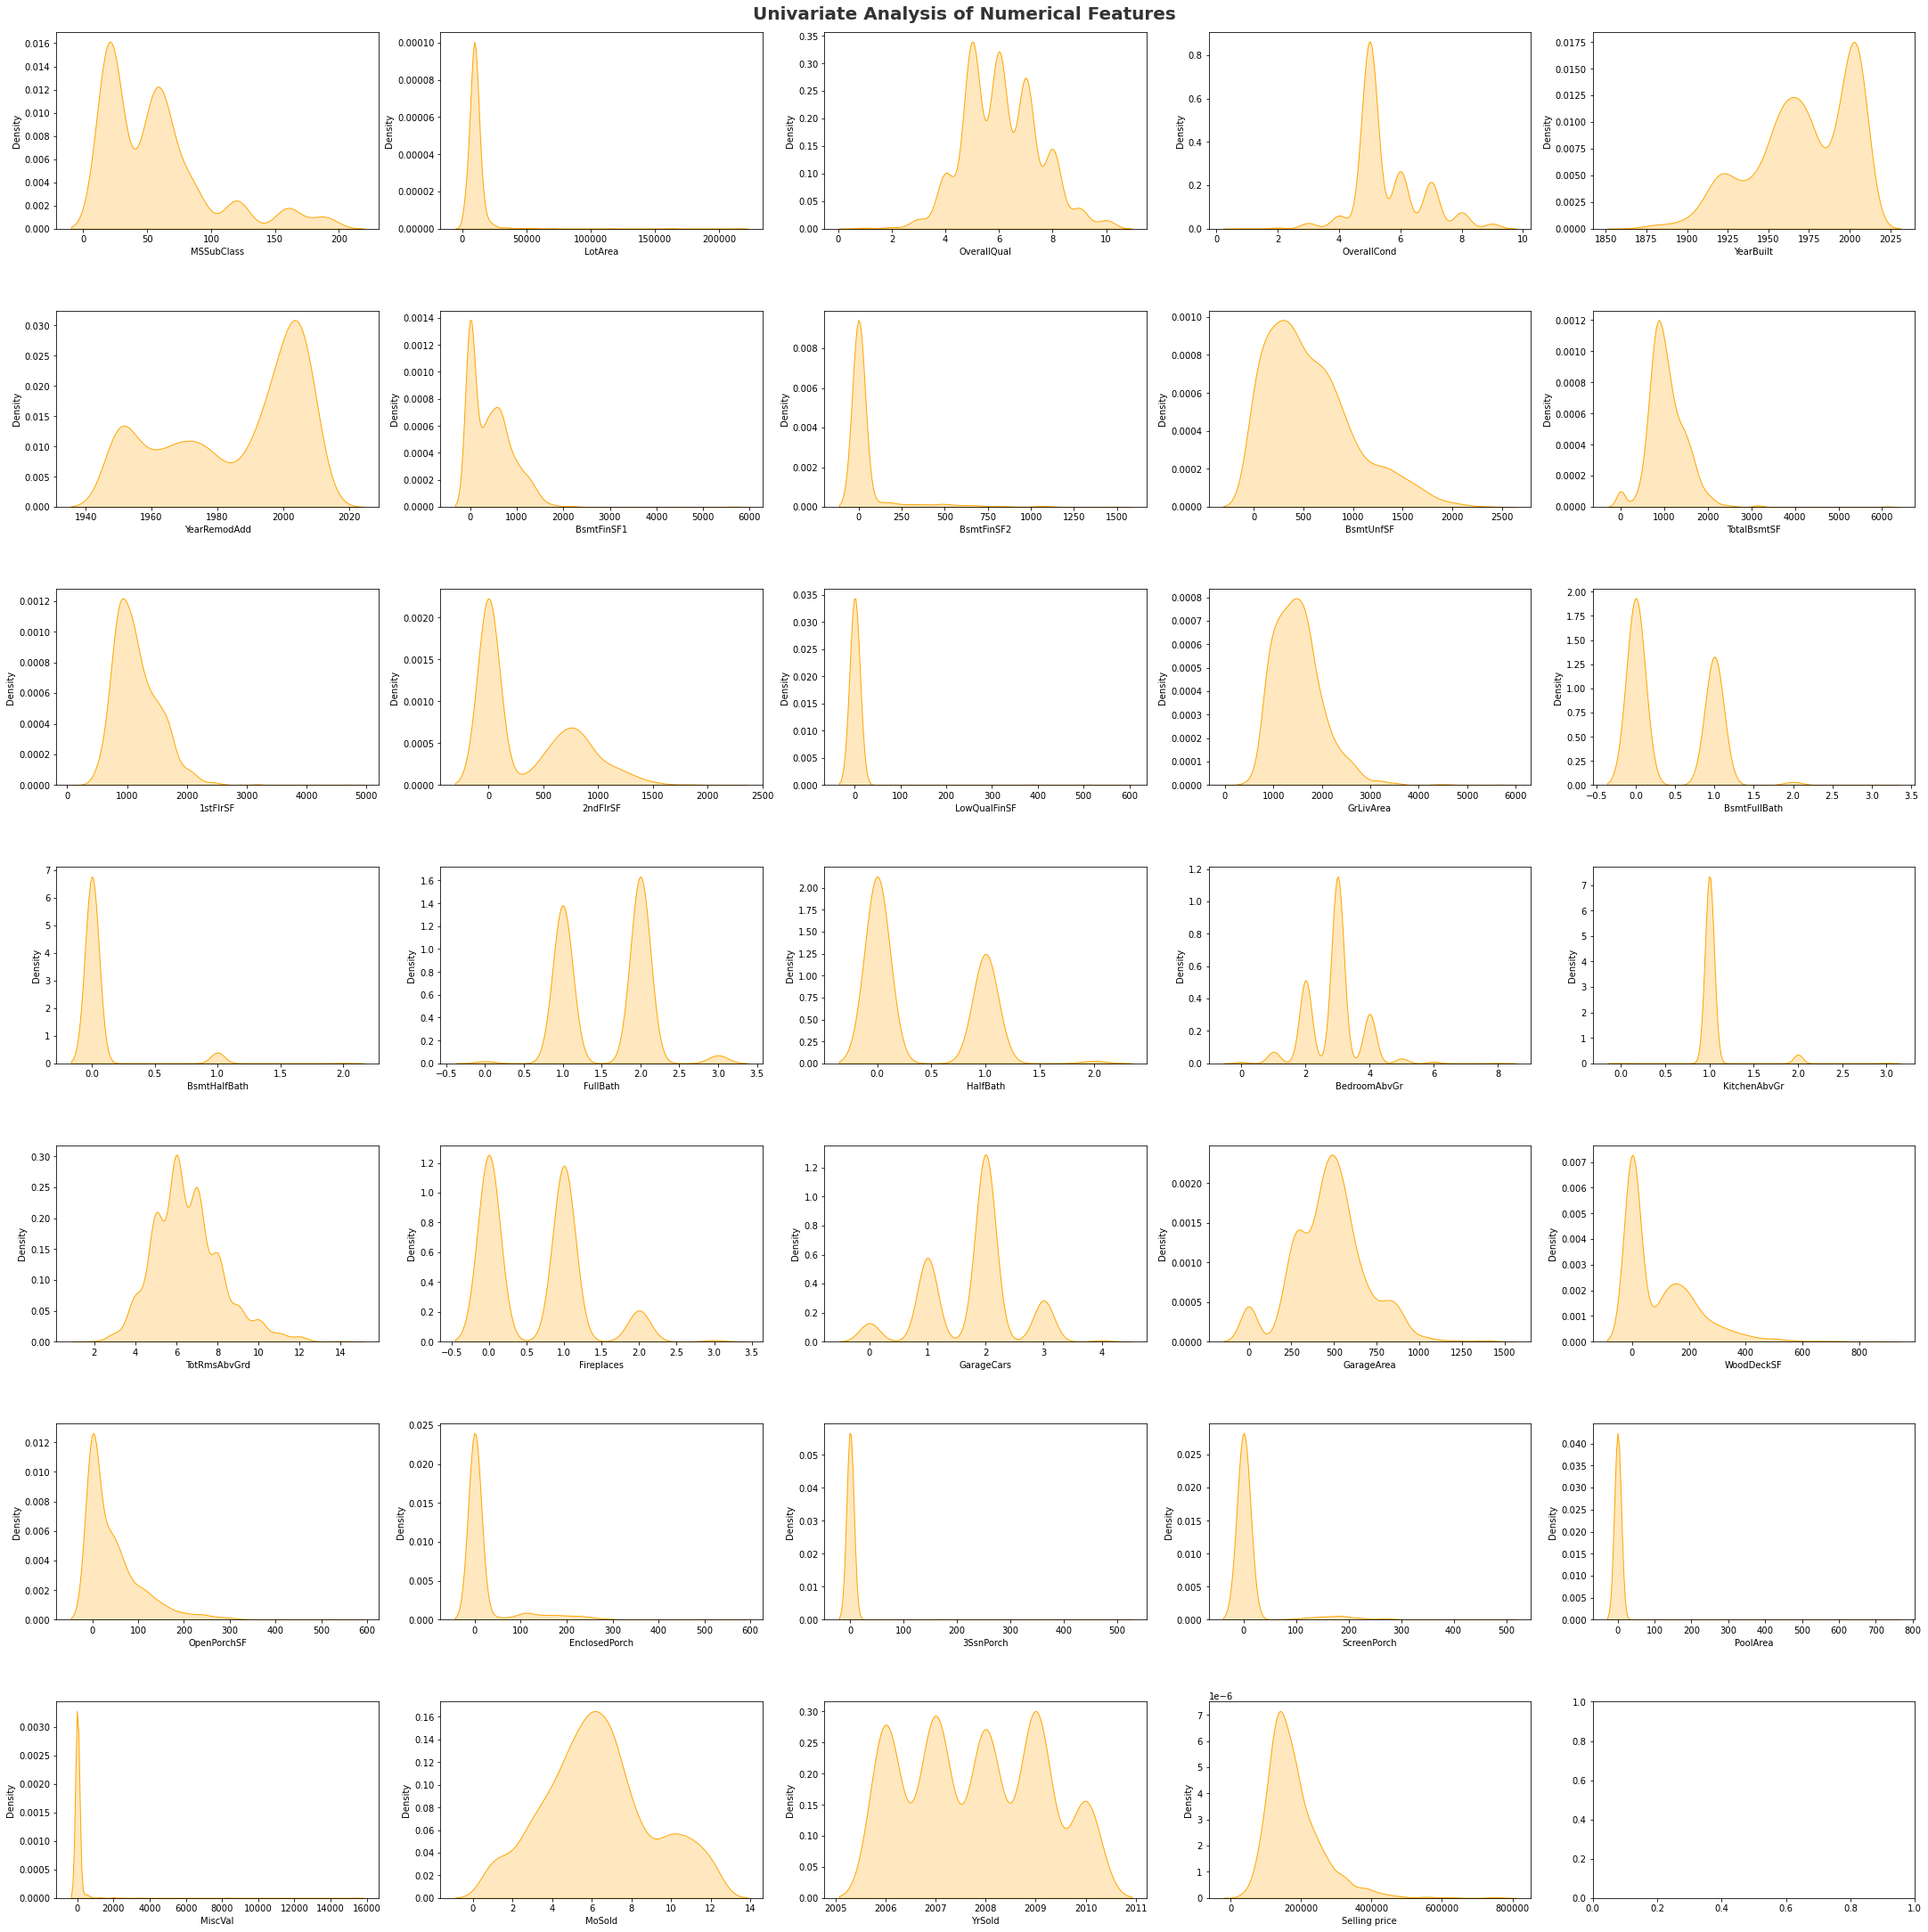

In [40]:
fig, ax = plt.subplots(ncols=5, nrows=7, figsize=(30,30))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

index = 0
ax = ax.flatten()

for col in num_col:
        sns.kdeplot(x=col, data=df, ax=ax[index],color='orange',shade=True)
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [41]:
# corr relation 
df.corr()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Selling price
MSSubClass,1.000000,-0.139781,0.032628,-0.059316,0.027850,0.040581,-0.069836,-0.065649,-0.140759,-0.238518,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotArea,-0.139781,1.000000,0.105806,-0.005636,0.014228,0.013788,0.214103,0.111170,-0.002618,0.260833,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.105806,1.000000,-0.091932,0.572323,0.550684,0.239666,-0.059119,0.308159,0.537808,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.046231,0.040229,-0.136841,-0.171098,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.014228,0.572323,-0.375983,1.000000,0.592855,0.249503,-0.049107,0.149040,0.391452,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.013788,0.550684,0.073741,0.592855,1.000000,0.128451,-0.067759,0.181133,0.291066,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
BsmtFinSF1,-0.069836,0.214103,0.239666,-0.046231,0.249503,0.128451,1.000000,-0.050117,-0.495251,0.522396,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.050117,1.000000,-0.209294,0.104810,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378
BsmtUnfSF,-0.140759,-0.002618,0.308159,-0.136841,0.149040,0.181133,-0.495251,-0.209294,1.000000,0.415360,...,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.214479
TotalBsmtSF,-0.238518,0.260833,0.537808,-0.171098,0.391452,0.291066,0.522396,0.104810,0.415360,1.000000,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581


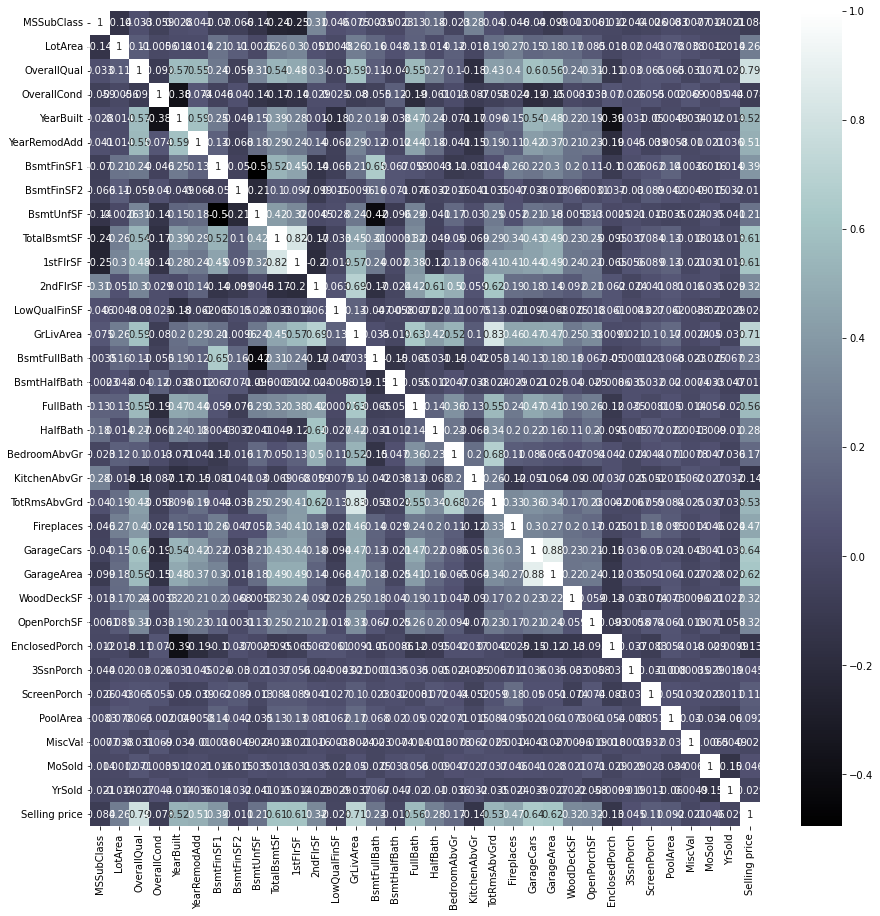

In [44]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(),cmap='bone',annot=True)
plt.show()

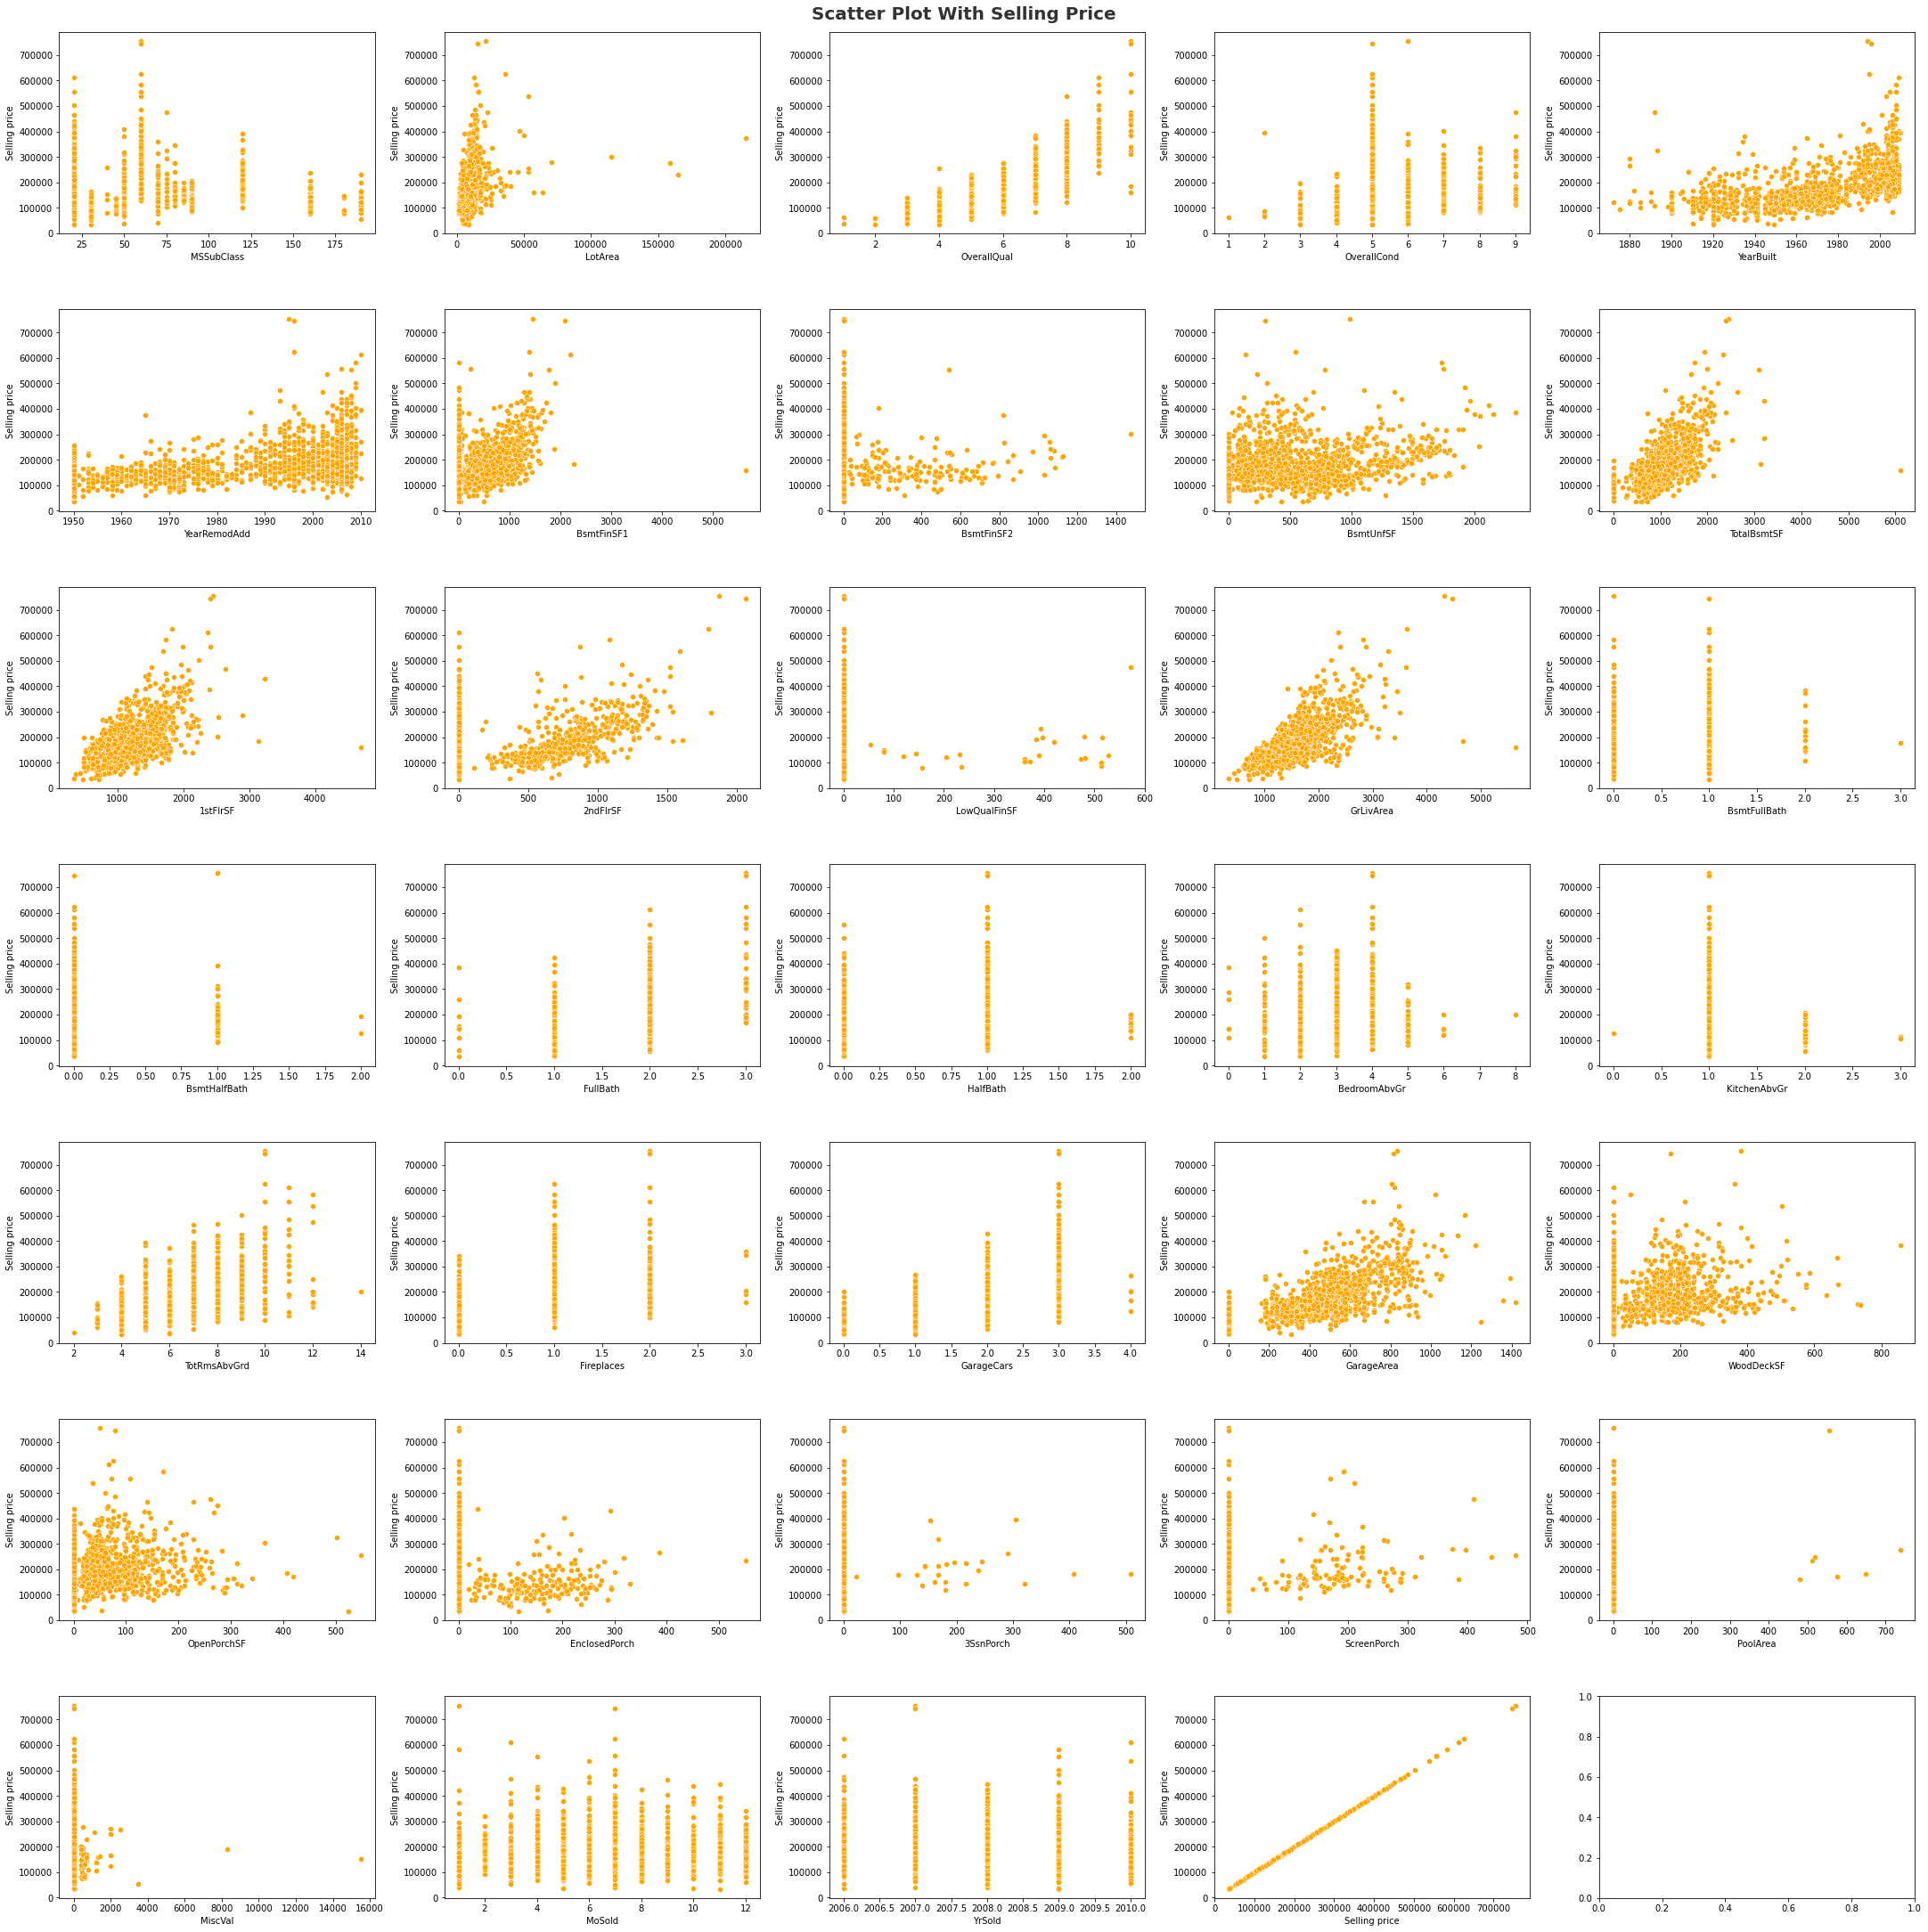

In [47]:
fig, ax = plt.subplots(ncols=5, nrows=7, figsize=(30,30))
plt.suptitle('Scatter Plot With Selling Price', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

index = 0
ax = ax.flatten()

for col in num_col:
        sns.scatterplot(x=col,y = df['Selling price'], data=df, ax=ax[index],color='orange')
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

**Observation**
1. selling price has linnear relationship with LotArea,YearremodAdd

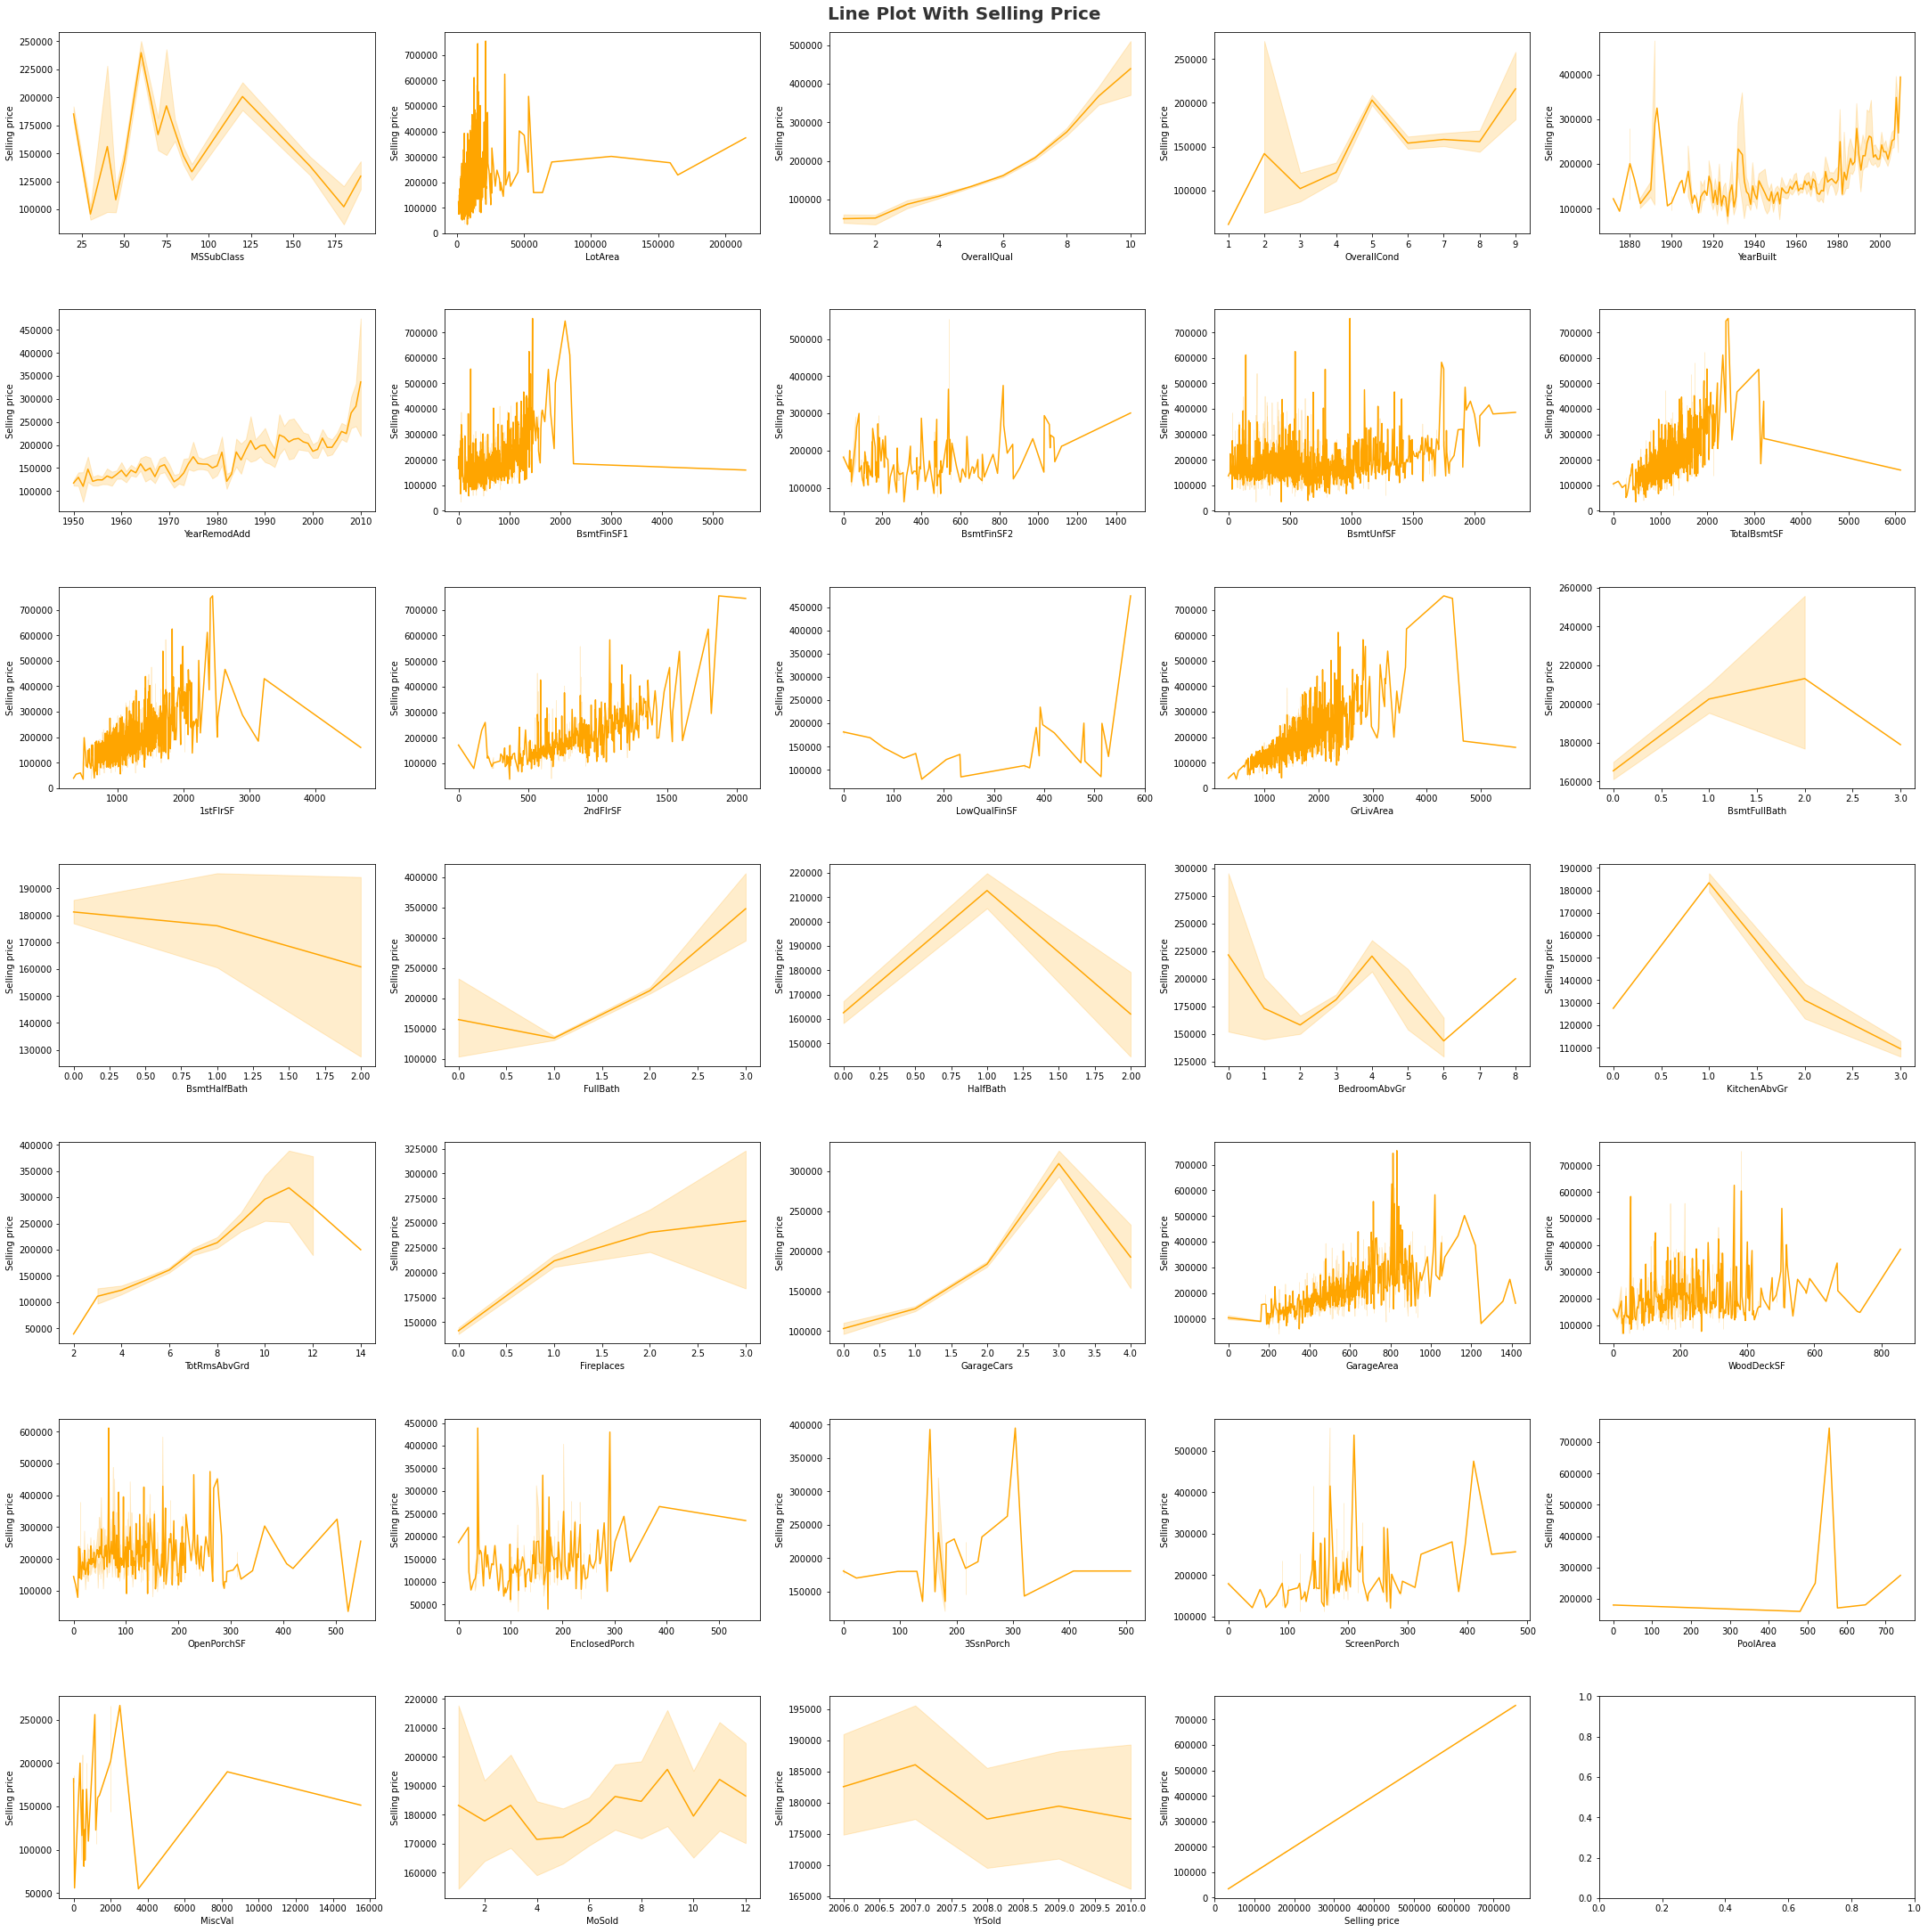

In [48]:
fig, ax = plt.subplots(ncols=5, nrows=7, figsize=(30,30))
plt.suptitle('Line Plot With Selling Price', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

index = 0
ax = ax.flatten()

for col in num_col:
        sns.lineplot(x=col,y = df['Selling price'], data=df, ax=ax[index],color='orange')
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

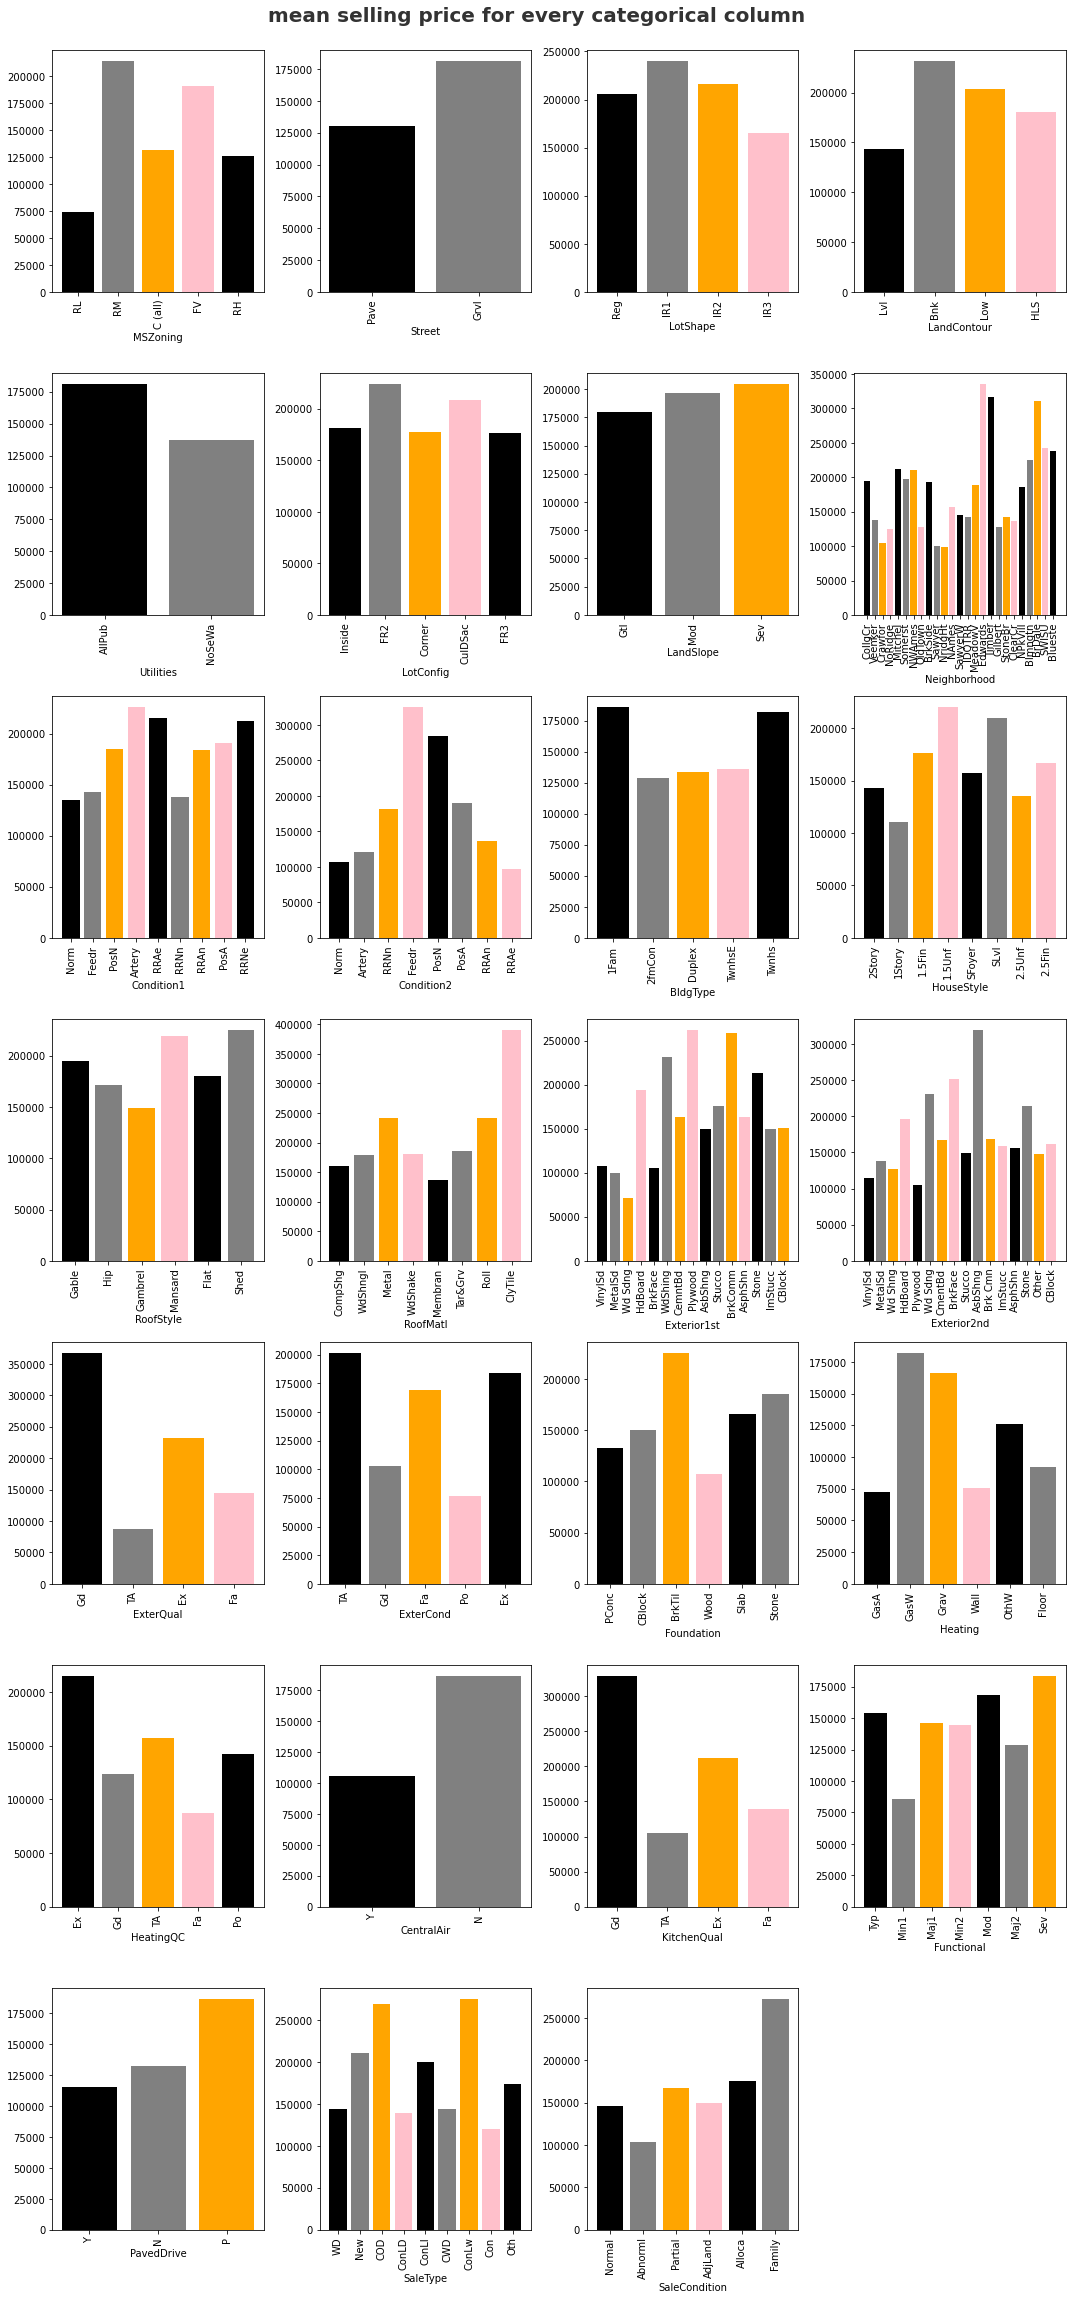

In [54]:
plt.figure(figsize=(15, 40))
plt.suptitle('mean selling price for every categorical column', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
colors = ['black', 'gray', 'orange', 'pink']
for i in range(0, len(cat_col)):
    plt.subplot(9,4,i+1)
    cat_list = df[cat_col[i]].unique()
    cat_average = df.groupby(cat_col[i]).mean()['Selling price']
    plt.bar(cat_list, cat_average, color=colors)
    plt.xlabel(cat_col[i])
    plt.xticks(rotation=90)
plt.tight_layout()

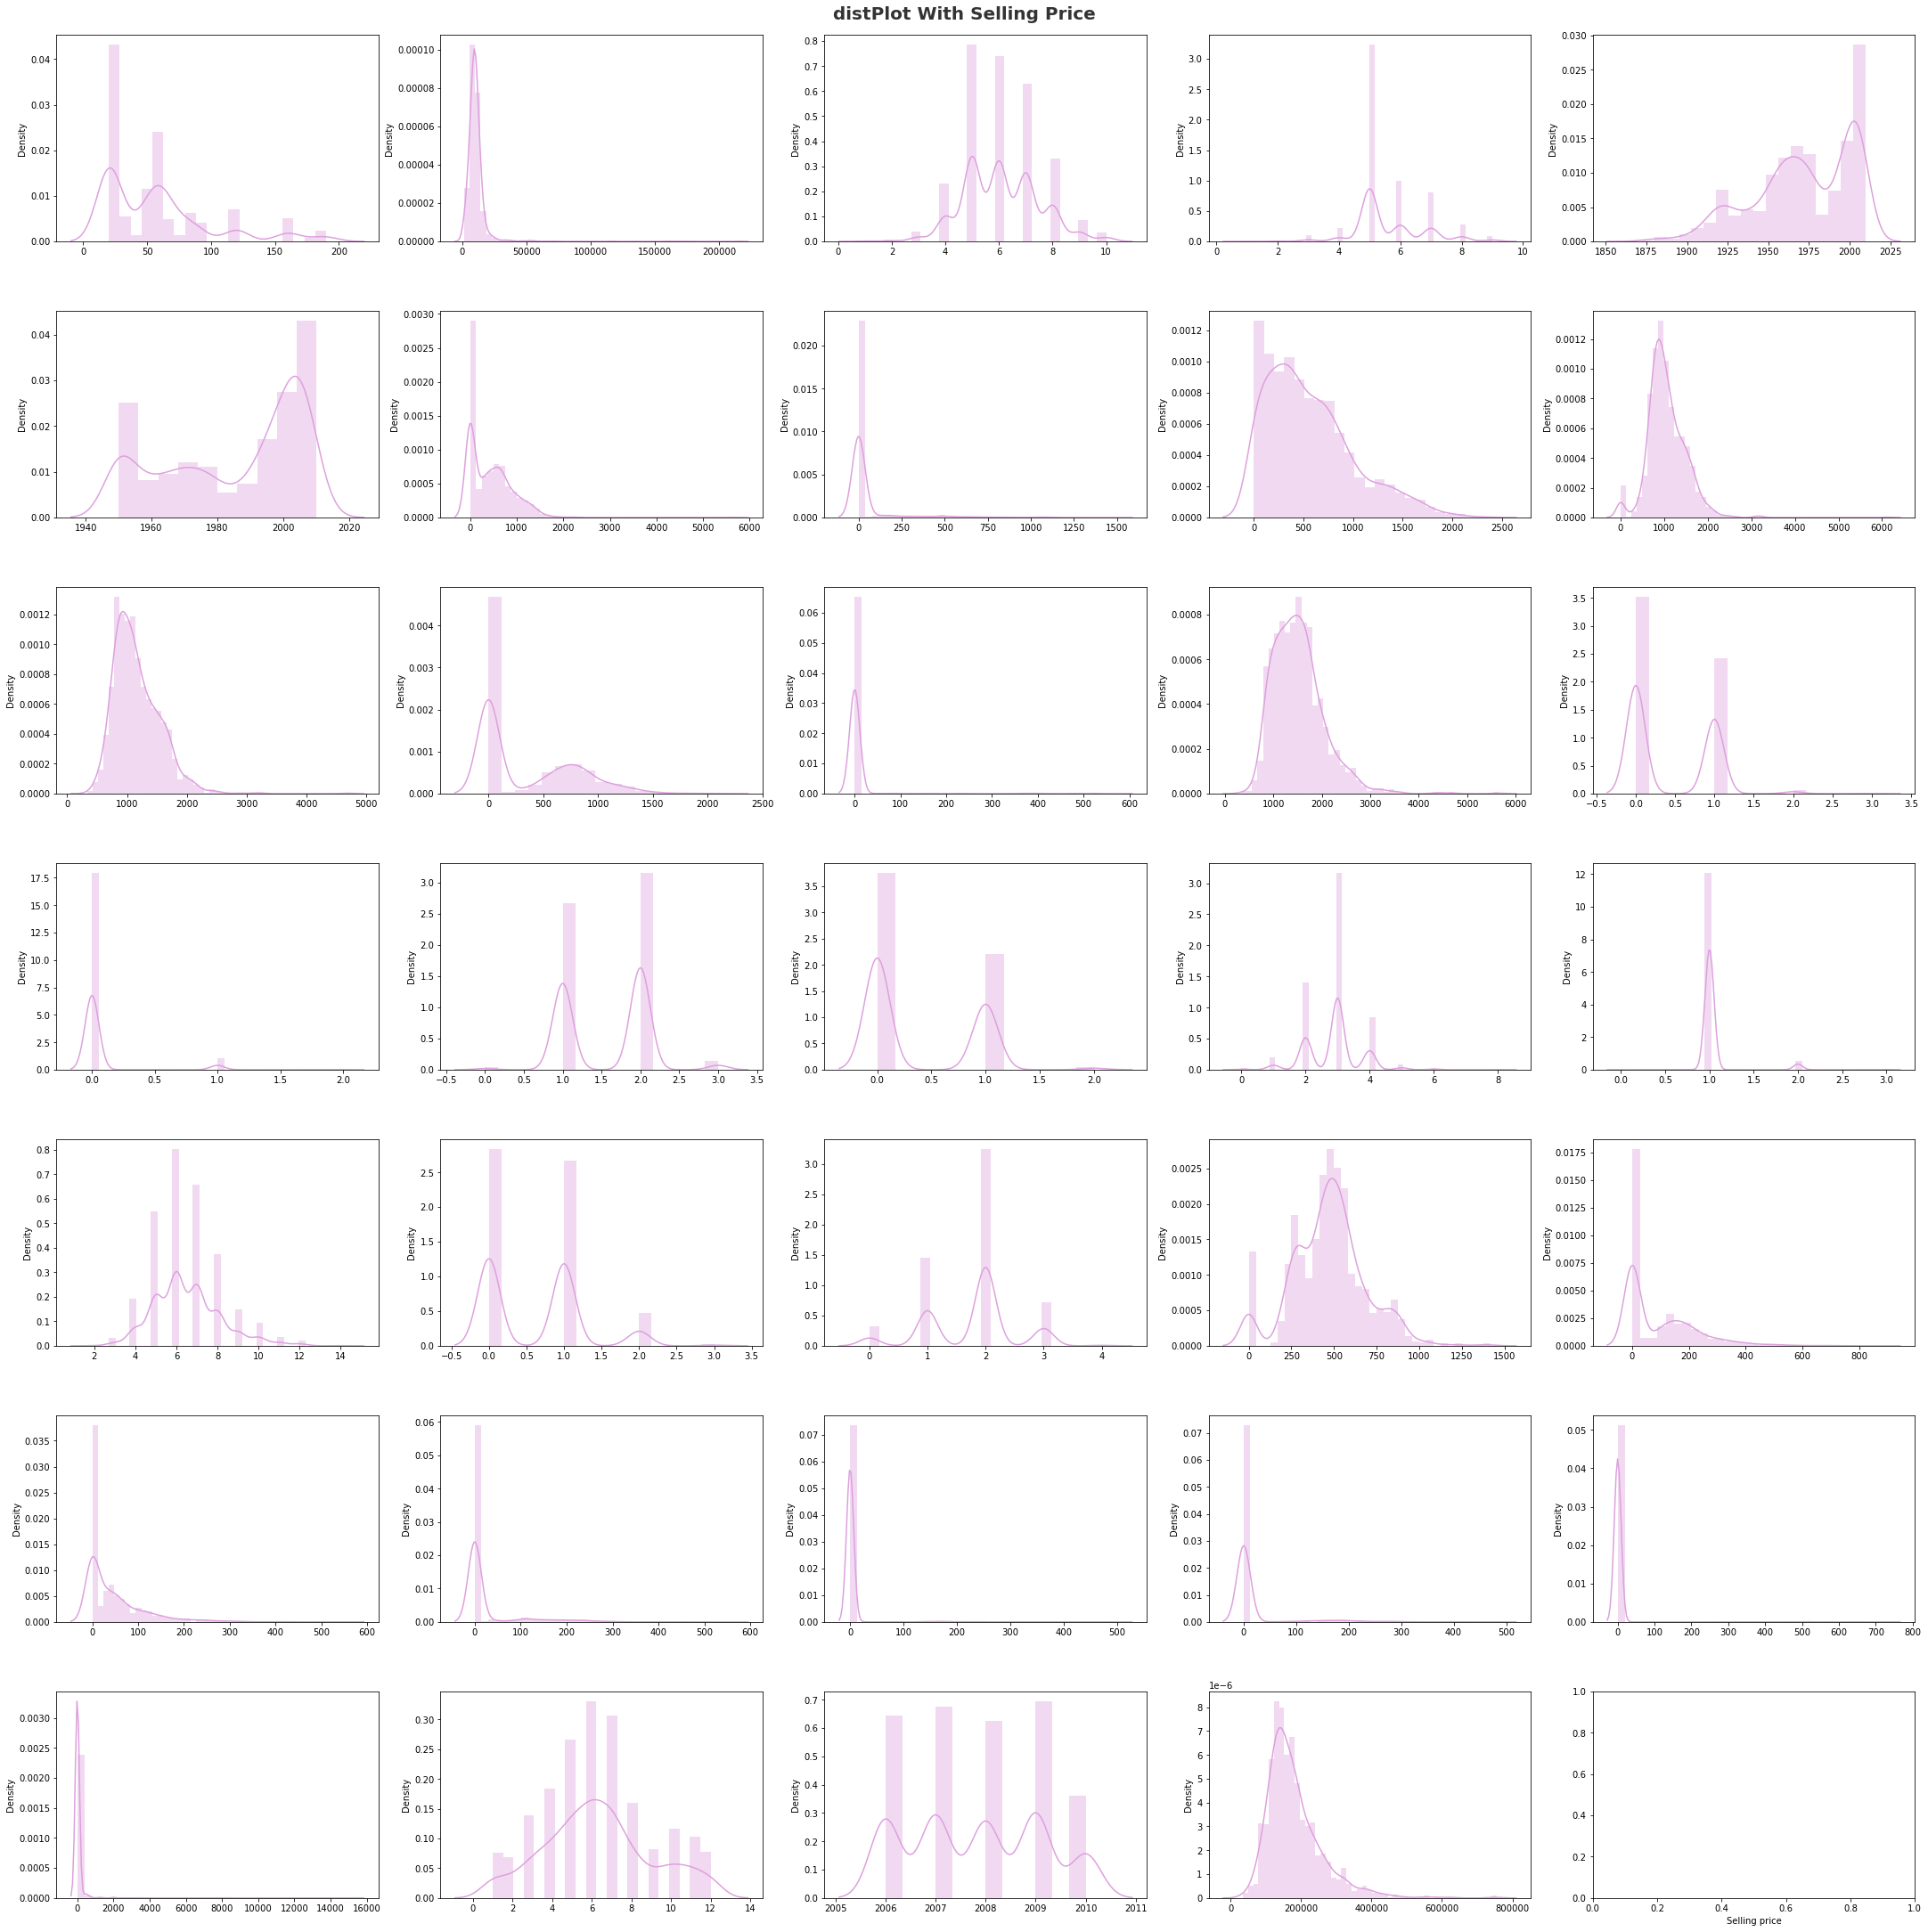

In [60]:
fig, ax = plt.subplots(ncols=5, nrows=7, figsize=(30,30))
plt.suptitle('distPlot With Selling Price', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
index = 0
ax = ax.flatten()

for col in num_col:
        sns.distplot(x=df[col], ax=ax[index],color='plum')
        index += 1
        plt.xlabel(col)
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [61]:
df.corr()['Selling price']

MSSubClass      -0.084284
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
Selling price    1.000000
Name: Selling price, dtype: float64

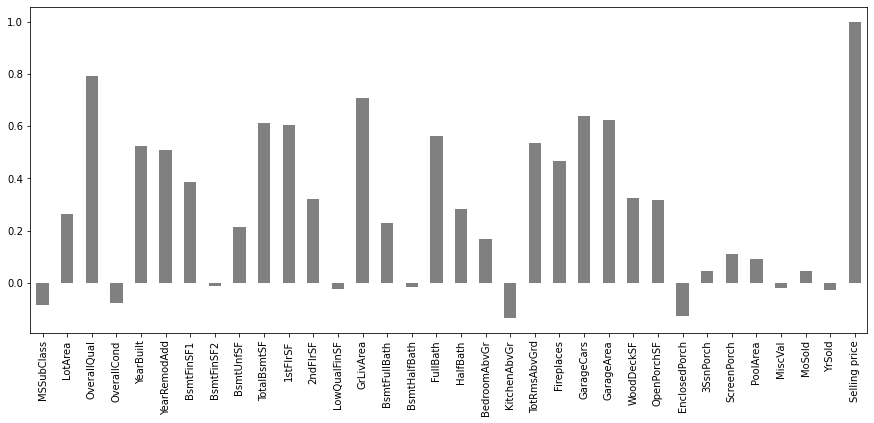

In [64]:
plt.figure(figsize = (15,6))
df.corr()['Selling price'].plot(kind = 'bar',color = 'gray')
plt.show()